In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import sys
import os
import pickle
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
import soundfile as sf
import numpy as np
import pandas as pd
import scipy.io.wavfile as wav
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

**Database Generation from Audio Files**

In [ ]:
# Extracting the required features from the audio files
def extract_features(audio, sample_rate):
    features = []
    # Chroma Features
    chroma_stft = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
    chroma_stft_mean = np.mean(chroma_stft).astype(np.float32)
    chroma_stft_var = np.var(chroma_stft).astype(np.float32)
    features.extend([chroma_stft_mean])
    features.extend([chroma_stft_var])

    # RMS
    rms = librosa.feature.rms(y=audio)
    rms_mean = np.mean(rms).astype(np.float32)
    rms_var = np.var(rms).astype(np.float32)
    features.extend([rms_mean])
    features.extend([rms_var])

    # Spectral Centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sample_rate)
    spectral_centroid_mean = np.mean(spectral_centroid).astype(np.float32)
    spectral_centroid_var = np.var(spectral_centroid).astype(np.float32)
    features.extend([spectral_centroid_mean])
    features.extend([spectral_centroid_var])

    # Spectral Bandwidth
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sample_rate)
    spectral_bandwidth_mean = np.mean(spectral_bandwidth).astype(np.float32)
    spectral_bandwidth_var = np.var(spectral_bandwidth).astype(np.float32)
    features.extend([spectral_bandwidth_mean])
    features.extend([spectral_bandwidth_var])

    # Rolloff
    rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sample_rate)
    rolloff_mean = np.mean(rolloff).astype(np.float32)
    rolloff_var = np.var(rolloff).astype(np.float32)
    features.extend([rolloff_mean])
    features.extend([rolloff_var])

    # Zero Crossing Rate
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio)
    zero_crossing_rate_mean = np.mean(zero_crossing_rate).astype(np.float32)
    zero_crossing_rate_var = np.var(zero_crossing_rate).astype(np.float32)
    features.extend([zero_crossing_rate_mean])
    features.extend([zero_crossing_rate_var])

    # Harmony and Perceptr
    harmony, perceptr = librosa.effects.hpss(audio)
    harmony_mean = np.mean(harmony).astype(np.float32)
    harmony_var = np.var(harmony).astype(np.float32)
    perceptr_mean = np.mean(perceptr).astype(np.float32)
    perceptr_var = np.var(perceptr).astype(np.float32)
    features.extend([harmony_mean])
    features.extend([harmony_var])
    features.extend([perceptr_mean])
    features.extend([perceptr_var])

    # Tempo
    tempo = librosa.feature.rhythm.tempo(y=audio, sr=sample_rate)[0].astype(np.float32)
    features.extend([tempo])

    # MFCCs
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=20)
    mfcc_means = np.mean(mfccs, axis=1).astype(np.float32)
    mfcc_vars = np.var(mfccs, axis=1).astype(np.float32)

    features.extend(mfcc_means)
    features.extend(mfcc_vars)

    return features

In [ ]:
import os
import librosa
import numpy as np
import pandas as pd

# Path to your dataset in Google Drive
path = "/content/drive/MyDrive/archive/Data/genres_original"

print("Path to dataset files:", path)
dataset = []
y = []

def extract_features(data, sample_rate):
    # Define your feature extraction method here
    # Example: returning MFCCs as features
    mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13)
    return np.mean(mfccs.T, axis=0)

# Parsing the Folders
for i, folder in enumerate(os.listdir(path)):
    folder_path = os.path.join(path, folder)

    # Ensure the item is a directory
    if not os.path.isdir(folder_path):
        print(f"Skipping non-directory item: {folder}")
        continue

    for j, file in enumerate(os.listdir(folder_path)):
        print(i, j, file)

        # Read the Audio File
        try:
            file_path = os.path.join(folder_path, file)
            data, sample_rate = librosa.load(file_path, sr=22050)
            data = librosa.effects.trim(data)[0]
        except Exception as e:
            print(f"File {file} is corrupt or cannot be loaded: {e}")
            continue

        # Trims the 30-second file into 3-second intervals
        gap = sample_rate * 3
        tempo = librosa.beat.beat_track(y=data, sr=sample_rate)[0]
        for k in np.arange(0, len(data) - gap, gap):
            lower = int(k)
            upper = int(k + gap)

            row = extract_features(data[lower:upper], sample_rate)
            dataset.append(np.array(row))
            y.append(folder)

y = pd.DataFrame(y)

Path to dataset files: /content/drive/MyDrive/archive/Data/genres_original
0 0 jazz.00016.wav
0 1 jazz.00007.wav
0 2 jazz.00017.wav
0 3 jazz.00020.wav
0 4 jazz.00010.wav
0 5 jazz.00000.wav
0 6 jazz.00008.wav
0 7 jazz.00013.wav
0 8 jazz.00009.wav
0 9 jazz.00004.wav
0 10 jazz.00015.wav
0 11 jazz.00014.wav
0 12 jazz.00002.wav
0 13 jazz.00003.wav
0 14 jazz.00011.wav
0 15 jazz.00019.wav
0 16 jazz.00012.wav
0 17 jazz.00001.wav
0 18 jazz.00018.wav
0 19 jazz.00005.wav
0 20 jazz.00006.wav
0 21 jazz.00029.wav
0 22 jazz.00036.wav
0 23 jazz.00032.wav
0 24 jazz.00038.wav
0 25 jazz.00041.wav
0 26 jazz.00046.wav
0 27 jazz.00024.wav
0 28 jazz.00045.wav
0 29 jazz.00023.wav
0 30 jazz.00037.wav
0 31 jazz.00047.wav
0 32 jazz.00039.wav
0 33 jazz.00030.wav
0 34 jazz.00022.wav
0 35 jazz.00050.wav
0 36 jazz.00048.wav
0 37 jazz.00026.wav
0 38 jazz.00034.wav
0 39 jazz.00040.wav
0 40 jazz.00021.wav
0 41 jazz.00033.wav
0 42 jazz.00035.wav
0 43 jazz.00051.wav
0 44 jazz.00027.wav
0 45 jazz.00042.wav
0 46 jazz.00043

**EDA**

In [ ]:
columns = ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var']

dataset = pd.DataFrame(dataset,columns=columns)
dataset['label'] = y
dataset.to_csv("/content/drive/MyDrive/archive/Data/genres_original/dataset.csv", index=False)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/archive/Data/genres_original/dataset.csv')

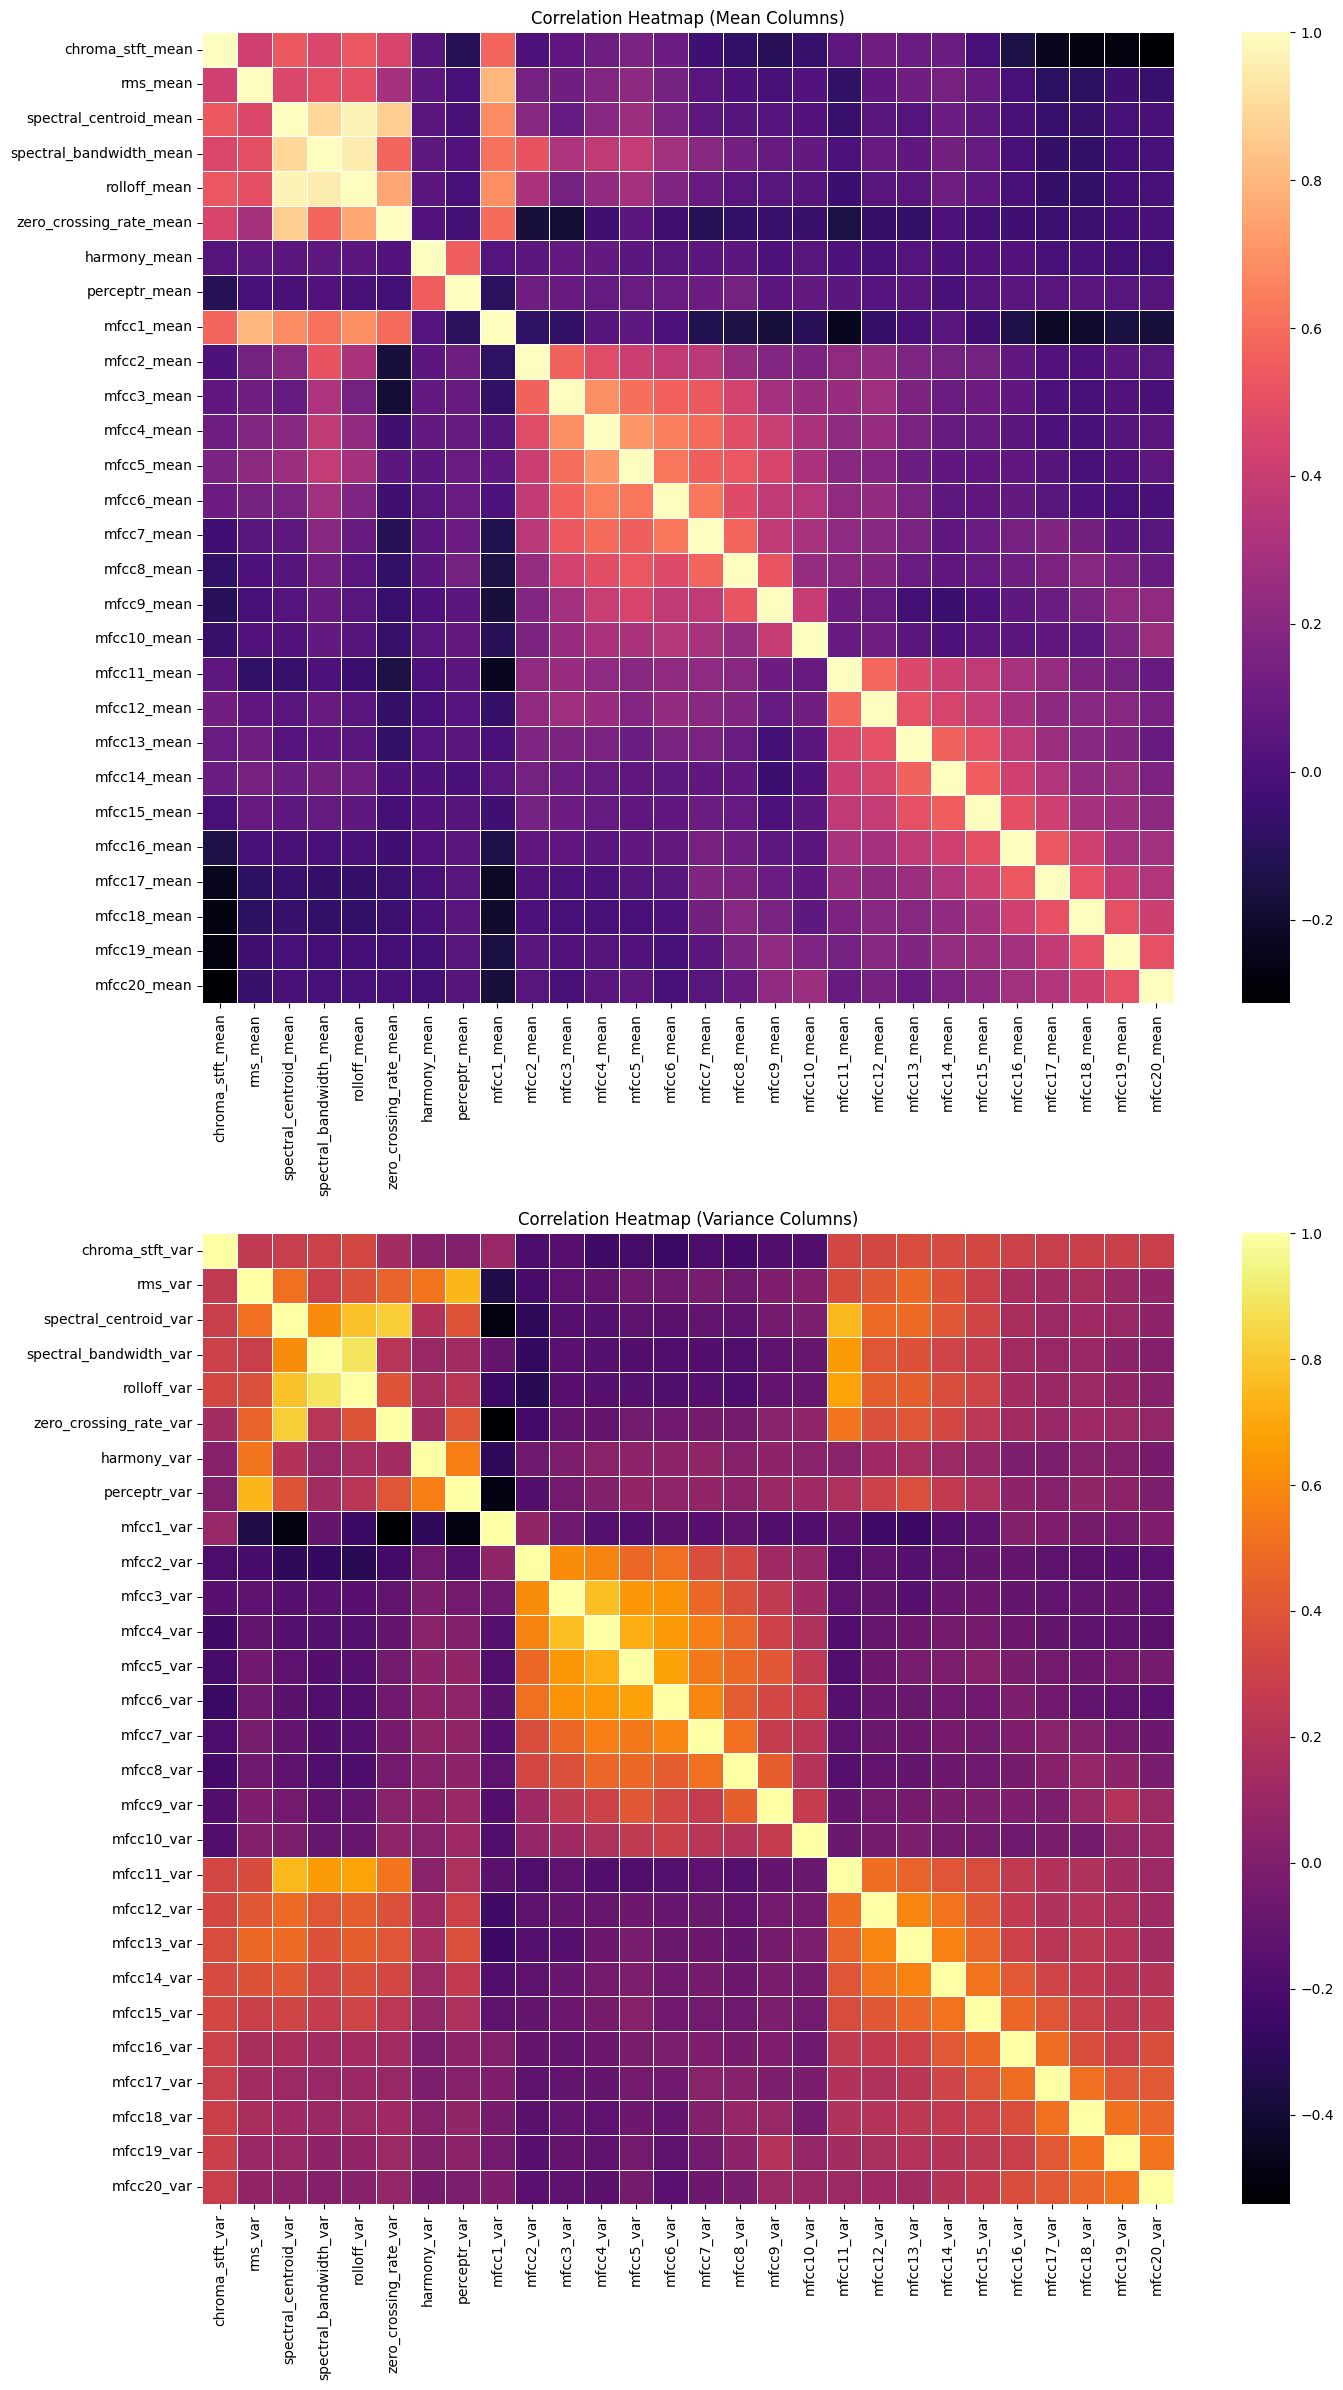

In [ ]:
columns_mean = [column for column in df.columns if 'mean' in column]
corr_mean = df[columns_mean].corr()

columns_var = [column for column in df.columns if 'var' in column]
corr_var = df[columns_var].corr()

plt.figure(figsize=(15, 24))

plt.subplot(2, 1, 1)
plt.title('Correlation Heatmap (Mean Columns)')
sns.heatmap(corr_mean, square=True, linewidths=.5, cmap="magma")

plt.subplot(2, 1, 2)
plt.title('Correlation Heatmap (Variance Columns)')
sns.heatmap(corr_var, square=True, linewidths=.5, cmap="inferno")
plt.savefig('/content/drive/MyDrive/archive/Data/genres_original/heatmap.png')

plt.tight_layout()
plt.show()



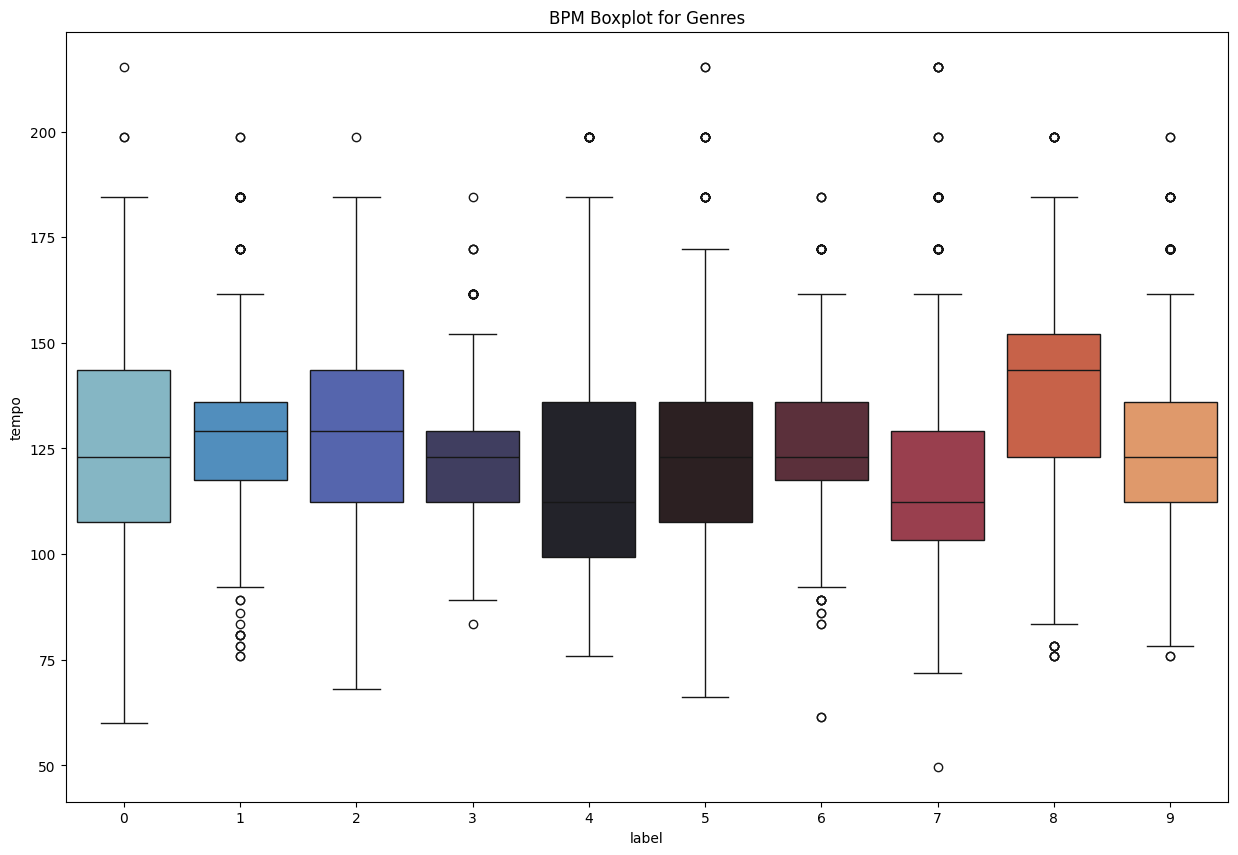

In [ ]:
# Since tempo is alone without any mean and var hence we check for the outliers
x = dataset[["label", "tempo"]]
color = {"blues":"b","classical":"c","country":"o","disco":"r","hiphop":"t","jazz":"p","metal":"g","pop":"v","reggae":"y","rock":"w"}
f, ax = plt.subplots(figsize=(15, 10));
sns.boxplot(x = "label", y = "tempo", data = x, palette = "icefire");

plt.title('BPM Boxplot for Genres')
plt.savefig("/content/drive/MyDrive/archive/Data/genres_original/BPM Boxplot.jpg")


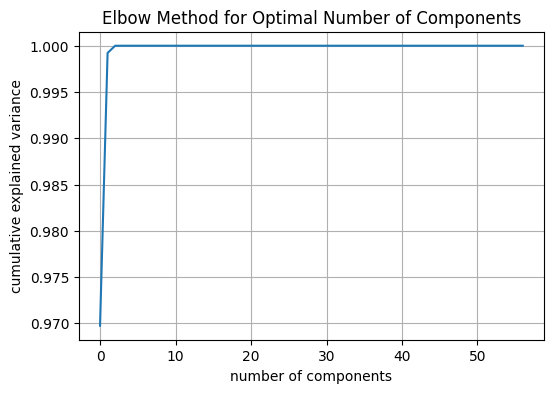

In [ ]:
!pip install scikit-learn # Ensure scikit-learn is installed
import sklearn.decomposition
from sklearn.decomposition import PCA # Import PCA from sklearn.decomposition

pca = PCA()
pca.fit(df.drop(['label'], axis=1))

plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Elbow Method for Optimal Number of Components')
plt.grid()
plt.savefig("/content/drive/MyDrive/archive/Data/genres_original/Elbow_Variance.jpg")
plt.show()

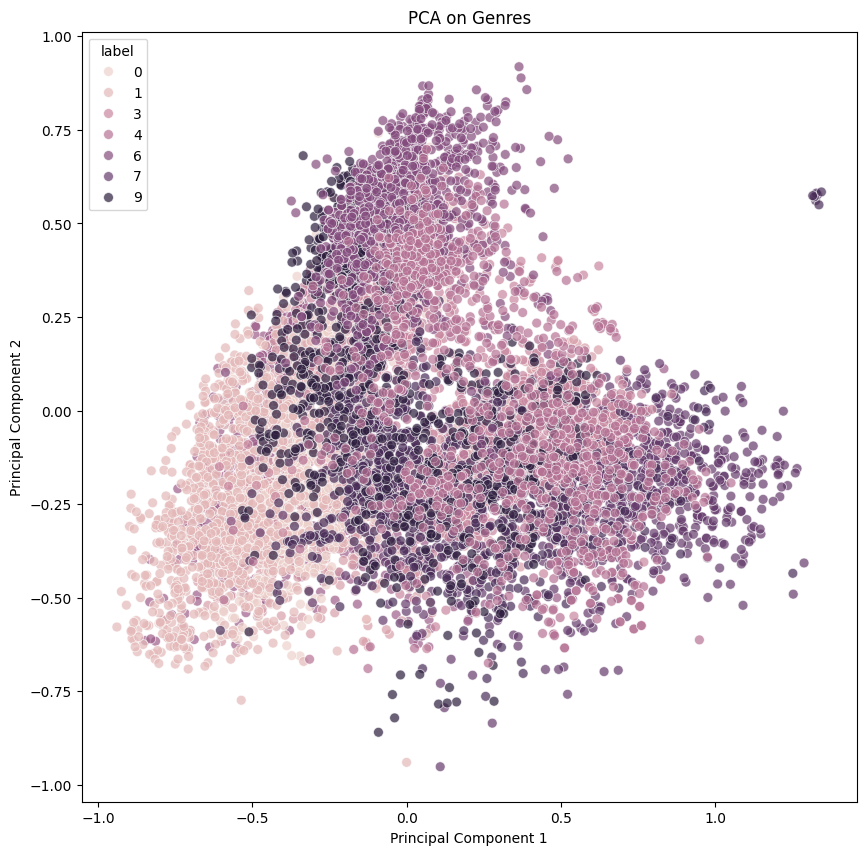

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

y = dataset['label']
X = dataset.drop(columns='label')

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

pca = PCA(n_components = 2)
df_pca = pd.DataFrame(pca.fit_transform(X), columns = ['Principal Component 1', 'Principal Component 2'])

final_df = pd.concat([df_pca, y], axis = 1)

plt.figure(figsize = (10,10))
sns.scatterplot(x = "Principal Component 1", y = "Principal Component 2", data = final_df, hue = "label", alpha = 0.7, s = 50);
plt.title('PCA on Genres')
plt.savefig("/content/drive/MyDrive/archive/Data/genres_original/PCA Scatter.jpg")


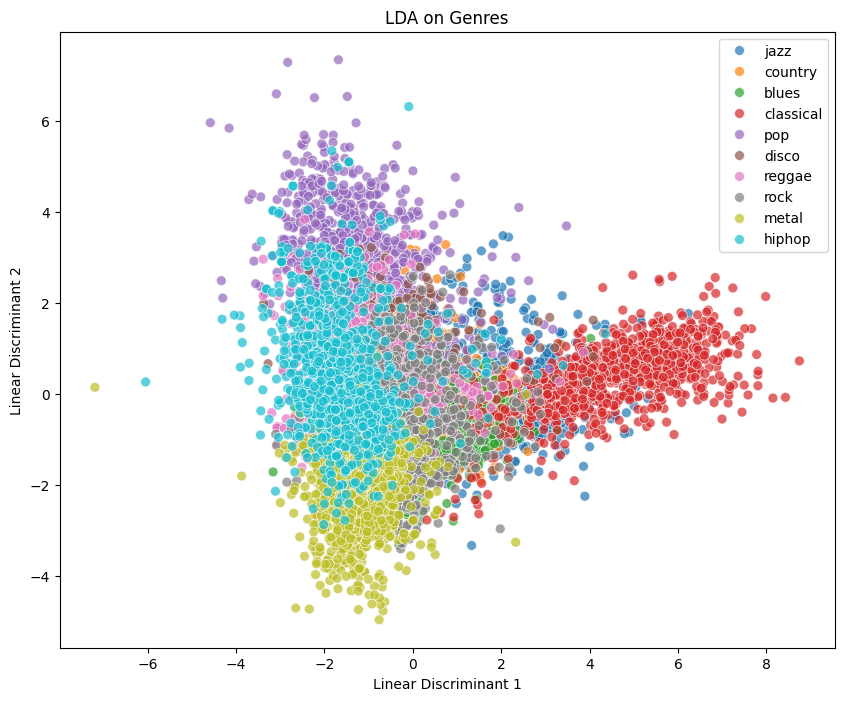

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Fit LDA model
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

# Create a new dataframe with the LDA components and the original labels
final_df_lda = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
final_df_lda['label'] = y

# Plot the LDA graph
plt.figure(figsize=(10, 8))
sns.scatterplot(x='LD1', y='LD2', hue='label', data=final_df_lda, alpha=0.7, s=50)
plt.title('LDA on Genres')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend(loc='best')
plt.savefig("/content/drive/MyDrive/archive/Data/genres_original/LDA Scatter.jpg")
plt.show()

**Preprocessing the data**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/archive/Data/genres_original/dataset.csv')

In [ ]:
df.head()


,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.272404,0.090163,0.044148,0.000250,1279.7836,76524.480,1720.0186,67904.920,2507.2102,677906.30,...,48.823510,39.414074,33.840595,36.795994,69.348200,85.976830,31.048119,68.419330,76.904160,jazz
1,0.260853,0.085766,0.038662,0.000539,1302.4211,57023.200,1655.1433,52770.484,2512.5935,459427.50,...,82.108550,89.594666,62.916218,66.637960,68.417970,50.974400,54.381910,40.261890,66.797160,jazz
2,0.227665,0.078846,0.100490,0.000983,1636.3704,38992.770,1697.9393,10129.301,3017.7130,174801.98,...,33.801950,31.847025,35.258995,26.223768,27.362139,46.267967,46.891624,24.567558,18.233550,jazz
3,0.227318,0.084051,0.056890,0.000401,1281.4966,62482.113,1776.3756,57635.350,2487.9960,718520.40,...,24.620886,34.696487,21.992954,45.841454,35.132263,44.269270,64.328920,35.829570,17.152594,jazz
4,0.250925,0.090767,0.073300,0.001154,1826.3496,287053.280,1745.5751,17970.025,3329.6130,972504.50,...,24.320278,53.750774,23.538631,24.080757,85.704850,48.814140,35.755295,85.562325,25.114841,jazz


In [ ]:
# Drop columns 'label' and 'Unnamed: 0' if they exist in the DataFrame
X = df.drop(columns=[col for col in ['label', 'Unnamed: 0'] if col in df.columns])


In [ ]:
le = LabelEncoder()
y = le.fit_transform(df['label'])


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
X_train.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
6617,0.471048,0.097509,0.287487,0.008543,3192.1700,1335303.60,3181.6213,170720.67,7117.7173,3119657.0,...,126.983475,35.253002,69.616750,51.457660,33.081110,44.475136,30.345884,49.230873,37.174200,51.224686
5615,0.526309,0.066195,0.127312,0.001658,2173.9521,170149.75,2110.9010,60560.89,4551.3735,586822.6,...,42.584150,29.908777,31.146446,28.527525,35.127740,28.375256,27.427124,34.222305,17.299960,25.858130
6420,0.499396,0.082685,0.191135,0.008643,3343.2530,1637605.10,3227.8586,227981.53,7175.8570,4704878.5,...,152.036290,72.516090,53.039898,62.588753,59.872320,59.950584,33.727850,59.035442,50.295470,36.093320
1789,0.395036,0.089212,0.137287,0.001400,2205.4836,431136.60,2307.4155,69998.98,4903.4414,1211006.0,...,67.910610,49.641880,65.665160,31.408304,26.728521,28.548910,35.311840,47.632015,31.558168,72.460720
900,0.444987,0.106421,0.053947,0.000971,1289.8912,868756.44,2457.4648,370224.16,2470.5210,8560448.0,...,11.462986,19.357786,15.564292,9.107935,9.212775,14.551829,13.268104,10.406388,10.628884,12.115148


**Models**

In [ ]:
from sklearn.model_selection import cross_val_score as cv
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score


**Logistic Regression**

In [ ]:
model = LogisticRegression(max_iter=10000)

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"CV Score for Logistic Regression: {max(cv_scores)}")


CV Score for Logistic Regression: 0.48090169067000627


**Support Vector Machine**

In [ ]:
model = SVC()

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"CV Score for SVC: {max(cv_scores)}")

CV Score for SVC: 0.2926065162907268


**KNN**

In [ ]:
model = KNeighborsClassifier()

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"CV Score for KNN: {max(cv_scores)}")


CV Score for KNN: 0.2817783343769568


**Gaussian Naive Bayes**

In [ ]:
model = GaussianNB()

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"CV Score for Gaussian Naive Bayes: {max(cv_scores)}")

CV Score for Gaussian Naive Bayes: 0.43045112781954886


**Decision Tree**

In [ ]:
model = DecisionTreeClassifier()

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"CV Score for Decision Tree: {max(cv_scores)}")

CV Score for Decision Tree: 0.6480901690670007


**MLP**

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(54, 54,), max_iter=1000)

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"CV Score for Neural Network: {max(cv_scores)}")


CV Score for Neural Network: 0.2116468378209142


**Hyper parameter Tuningt**

In [ ]:
joblib.dump(model, '/content/drive/MyDrive/archive/Data/genres_original.pkl')
joblib.dump(le, '/content/drive/MyDrive/archive/Data/genres_original.pkl')

['/content/drive/MyDrive/archive/Data/genres_original.pkl']

In [ ]:
print(accuracy_score(y_train,model.predict(X_train)))

0.999123136665414


**Function for predictiont**

In [ ]:
model_file = "/content/drive/MyDrive/archive/Data/genres_original.pkl"
label_encoder = "/content/drive/MyDrive/archive/Data/genres_original.pkl"

def Genre_Classifier(path):
    audio_data , sample_rate = librosa.load(path)
    audio_data = librosa.effects.trim(audio_data)[0]

    features = []
    divided = sample_rate * 3
    for k in np.arange(0,len(audio_data)-divided, divided):
        lower = int(k)
        upper = int(k + gap)

        feature_row = extract_features(audio_data[lower:upper], sample_rate)
        features.append(np.array(feature_row))

    features = pd.DataFrame(features)

    classifier = joblib.load(model_file)
    result = classifier.predict(features)

    decode = joblib.load(label_encoder)
    return decode.inverse_transform([pd.DataFrame(result).mode()[0][0]])[0]

Genre_Classifier('/content/drive/MyDrive/archive/Data/genres_original/blues/blues.00001.wav')